### WordCloud of sleep text scores

In [1]:
%%bash
sudo apt update
sudo apt install fonts-ipaexfont  # for Japanese in wordcloud

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,517 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,652 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-update



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [2]:
!pip install wordcloud
!pip install japanize-matplotlib  # for Japanese in matplotlib graph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 46.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=8d4760d62e818c7583d94917a16c3c86d9eac7381da5f88596352173c69be5f3
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


#### Import libraries  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  # for Japanese in matplotlib graph
from wordcloud import WordCloud, STOPWORDS

#### Setup working directory

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Documents/ds2024/dsF1/

Mounted at /content/drive
/content/drive/MyDrive/Documents/ds2024/dsF1


#### Parameters  

In [5]:
csv_in = 'sleep-text-score-wakati.csv'

#### Read CSV file  

In [6]:
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(426, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               426 non-null    object
 1   GPT-4o             426 non-null    int64 
 2   Gemini-1.5-Pro     426 non-null    int64 
 3   Claude-3.5-Sonnet  426 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.4+ KB
None


,text,GPT-4o,Gemini-1.5-Pro,Claude-3.5-Sonnet
0,就寝 時間 毎日 一定 する,2,2,2
1,朝日 積極的 浴びる,2,2,2
2,寝室 温度 18 -22度 保つ,2,2,2
3,就寝 前 ストレッチ 体 リラックス さ せる,2,2,2
4,寝具 定期的 清潔 保つ,2,2,2


#### Check the number of documents in each category  

In [7]:
print(df['Claude-3.5-Sonnet'].value_counts().sort_index(ascending=True))

Claude-3.5-Sonnet
0    184
1     81
2    161
Name: count, dtype: int64


#### Generating WordCloud

In [8]:
fpath = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"

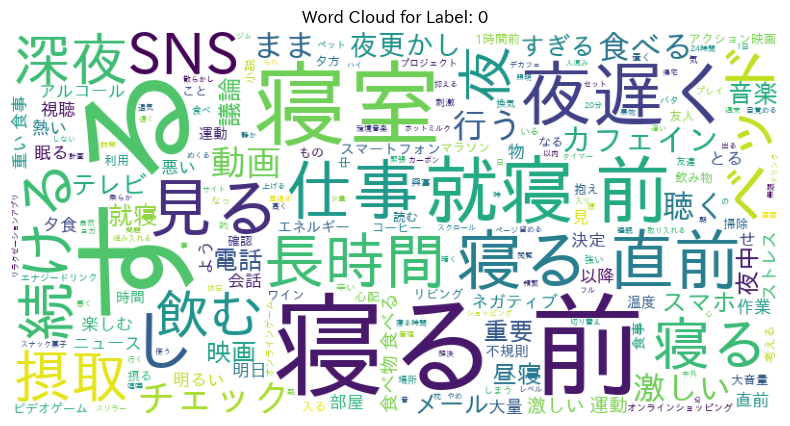

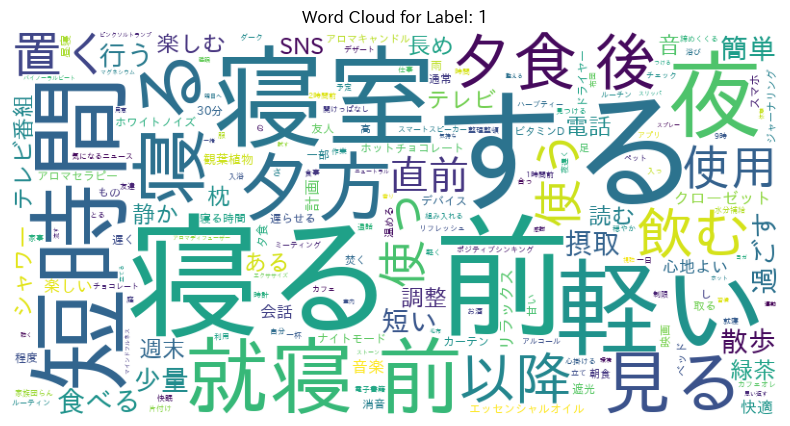

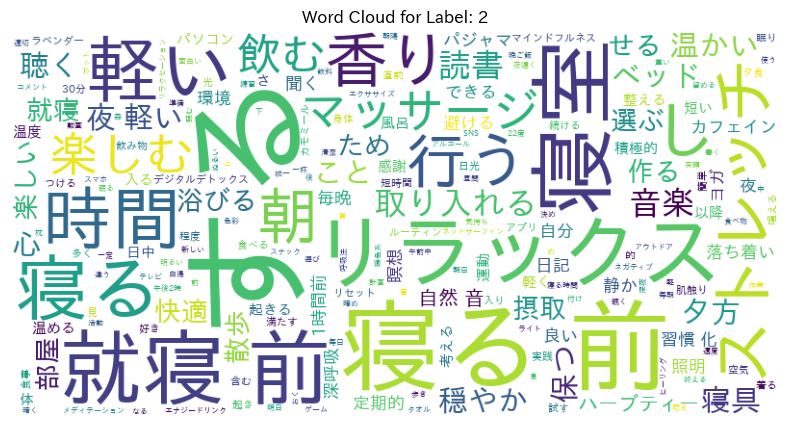

In [9]:
sorted_labels = sorted(df['Claude-3.5-Sonnet'].unique())

for label in sorted_labels:
    text_data = df[df['Claude-3.5-Sonnet'] == label]['text'].str.cat(sep=' ')

    wc = WordCloud(width=800, height=400, background_color='white',
                   font_path=fpath).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}')
    plt.show()

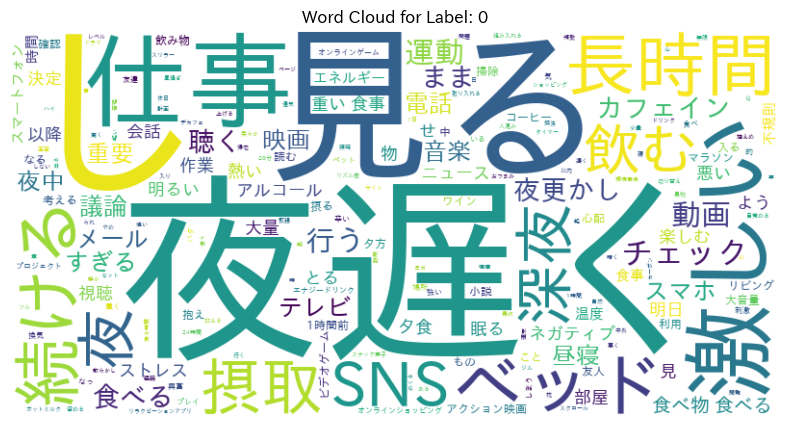

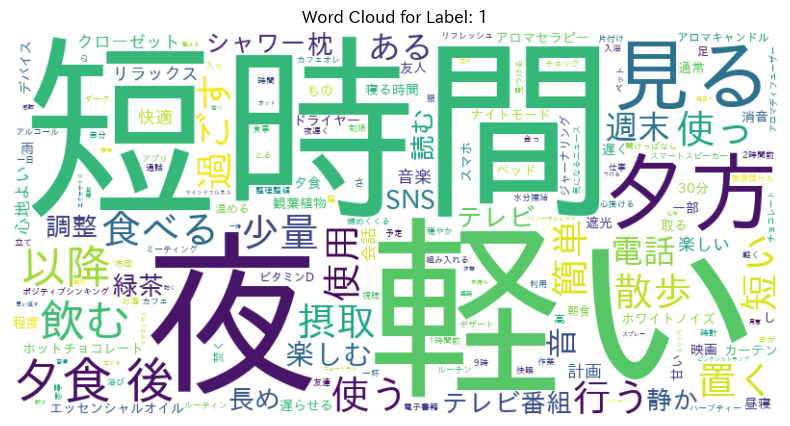

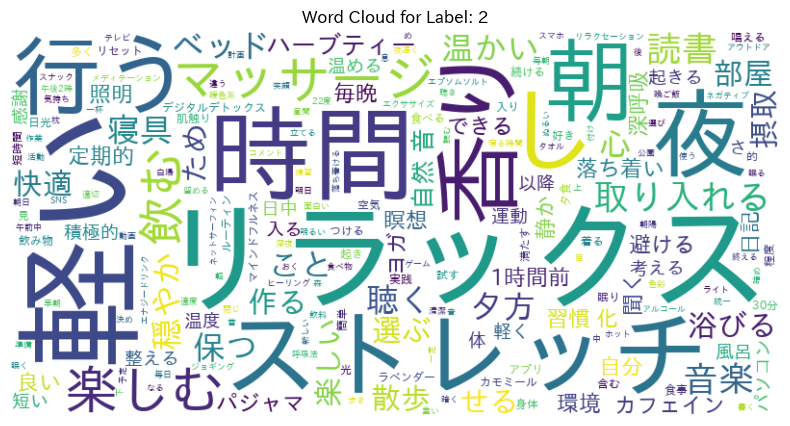

In [10]:
excluded_words = set(['寝る', '前', '直前', 'する', '就寝', '寝室'])

sorted_labels = sorted(df['Claude-3.5-Sonnet'].unique())

for label in sorted_labels:
    text_data = df[df['Claude-3.5-Sonnet'] == label]['text'].str.cat(sep=' ')

    wc = WordCloud(width=800, height=400, background_color='white',
                   font_path=fpath, stopwords=STOPWORDS.union(excluded_words)).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}')
    plt.show()

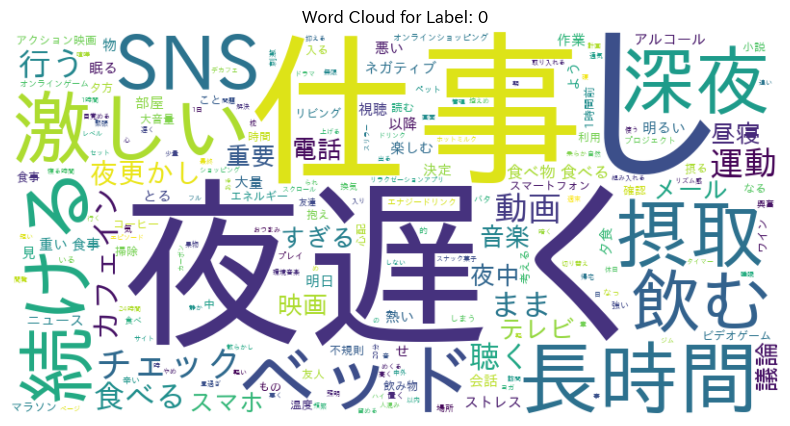

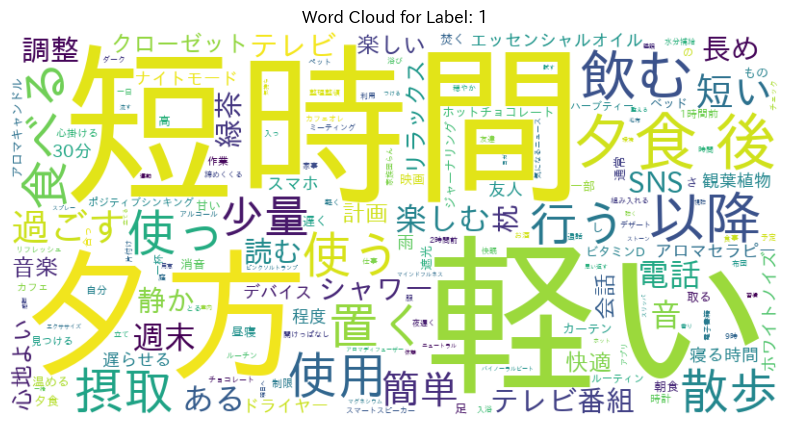

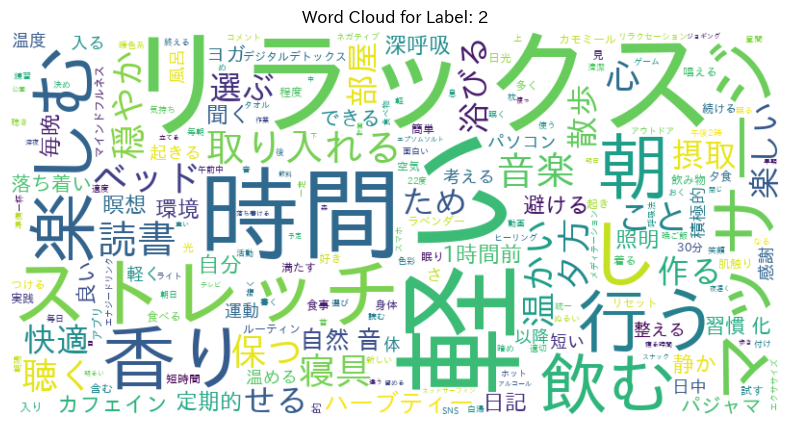

In [11]:
excluded_words = set(['寝る', '前', '直前', 'する', '就寝', '寝室', '夜', '見る'])

sorted_labels = sorted(df['Claude-3.5-Sonnet'].unique())

for label in sorted_labels:
    text_data = df[df['Claude-3.5-Sonnet'] == label]['text'].str.cat(sep=' ')

    wc = WordCloud(width=800, height=400, background_color='white',
                   font_path=fpath, stopwords=STOPWORDS.union(excluded_words)).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}')
    plt.show()